In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Zero = np.array([[1], [0.]])
One = np.array([[0], [1.]])

P0 = np.dot(Zero, Zero.T)
P1 = np.dot(One, One.T)

sigmax = np.array([[0, 1], [1, 0.]])
sigmaz = np.array([[1, 0], [0, -1]])

def groundstate(X):
    eigen_values, eigen_vectors = np.linalg.eig(X)
    index = eigen_values.argsort()
    eigen_vectors = eigen_vectors[:, index]
    return eigen_vectors[:, 0]

def clause_to_H(n, clause):
    # convert a clause like [1,-3]
    # which means x1 or ~x3 to
    # P0 x I x P1 x I x I   where x is tensor product
    H_list = [np.eye(2)]*n
    for i in clause:
        if i>0: H_list[i-1] = P0
        else:   H_list[-i-1] = P1
    H = np.array([[1.0]])
    for i in H_list:
        H = np.kron(H, i)
    return H

def evaluate(expression):
    # returns a list of boolean values of expression
    # for all possible combination of variable values.
    n = max(max(abs(v) for v in clause) for clause in expression)
    h = {}
    for i in range(2**n):
        hi = True
        for c in expression:
            clause_true = False
            for ci in c:
                if (ci>0 and i&(2**(ci-1))) or \
                    (ci<0 and ~i&(2**(-ci-1))):
                    clause_true = True                
            hi = hi and clause_true
        h[i] = hi
    return h

In [3]:
# lets choose the expression 
# x1 and x2 and x3 and ~x4 and ~x5
formula = [[1],[2],[3],[-4],[-5]]

In [4]:
# it has a unique solution
h = evaluate(formula)
for k, v in h.items():
    print(k, "T" if v else "")

0 
1 
2 
3 
4 
5 
6 
7 T
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 


In [5]:
n = 5

H2 = clause_to_H(n, formula[0])
for i in formula[1:]:
    H2 = H2 + clause_to_H(n, i)

sigmax = np.array([[0, 1], [1, 0.]])
H1 = np.zeros((2**5, 2**5))
for k in range(n):
    h = np.array([[1.0]])
    for i in range(n):
        if i==k:
            h = np.kron(h, sigmax)
        else:
            h = np.kron(h, np.eye(2))
    H1 = H1 + h
    
H = lambda tau: (1-tau) * H1 + tau * H2

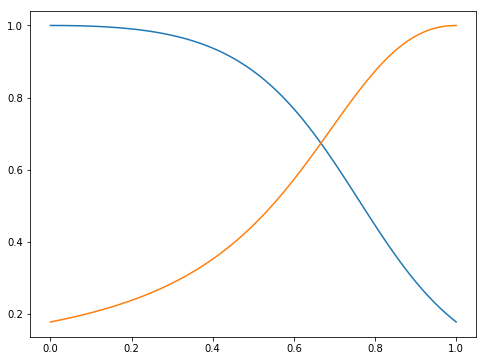

In [6]:
psi_0 = groundstate(H(0))
psi_1 = groundstate(H(1))

b1 = []
b2 = []
Tau = []
for i in range(101):
    tau = i/100.
    Tau.append(tau)

    psi_tau = groundstate(H(tau))
    
    b1.append(np.abs(np.inner(psi_tau, psi_0)))
    b2.append(np.abs(np.inner(psi_tau, psi_1)))

plt.figure(figsize=(8, 6))
plt.plot(Tau, b1)
plt.plot(Tau, b2)
plt.show()